## Clusterização com o algoritmo Mean Shift



In [8]:
# Importar as bibliotecas
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

In [9]:
# Fazer o download do dataset de clientes de shopping
mall0 = pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/Data-Science-for-Marketing-Analytics-Second-Edition/master/Chapter03/Datasets/Mall_Customers.csv")
mall0.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [11]:
# Renomear as colunas
mall0.rename({'Annual Income (k$)':'Income', 'Spending Score (1-100)':'Spend_score'}, axis=1, inplace=True)
mall0.head()

,CustomerID,Gender,Age,Income,Spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


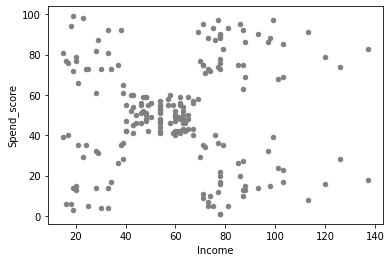

In [4]:
# Plotar um grafico de dispersão da renda pelo score de gastos
mall0.plot.scatter(x='Income', y='Spend_score', color='gray')
plt.show()

In [5]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [6]:
# Ajustar o valor da largura de banda do Mean Shift
bandwidth = 0.9

In [12]:
# Criar uma copia do dataframe original
mall_scaled = mall0.copy()
# Definir as colunas a serem re-escaladas
cols_to_scale = ['Age', 'Income', 'Spend_score']

from sklearn.preprocessing import StandardScaler
# Instanciar o re-escalador
scaler = StandardScaler()

# Re-escalar as colunas selecionadas
mall_scaled[cols_to_scale] = scaler.fit_transform(mall_scaled[cols_to_scale])

In [8]:
# Selecionar as colunas da clusterização
cluster_cols = ['Income', 'Spend_score']

# Filtrar as colunas de interesse
X = mall_scaled[cluster_cols]

# Instanciar um objeto da classe MeanShift
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

# Fazer o fit do modelo aos dados
ms.fit(mall_scaled[cluster_cols])

# Realizar a predição e guardar o resultado numa coluna do dataframe re-escalado
mall_scaled['Cluster']= ms.predict(X)

In [9]:
mall_scaled['Cluster'].unique()

array([4, 3, 0, 2, 1])

In [26]:
markers = ['x', '*', '.', '|', '_', '1', '2']
color = ['blue', 'red', 'yellow', 'pink', 'purple', 'gray', 'magenta']

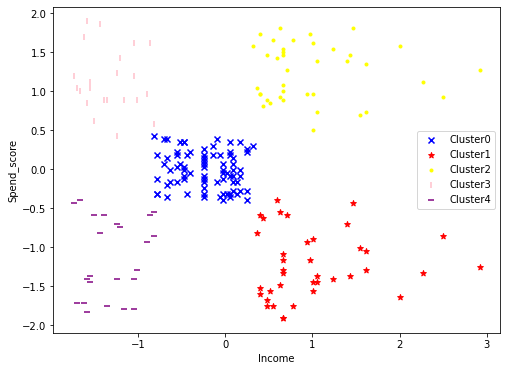

In [11]:
# Plotar o resultado da clusterização
plt.figure(figsize=[8,6])

for clust in range(mall_scaled.Cluster.nunique()):
    temp = mall_scaled[mall_scaled.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, \
                marker=markers[clust], \
                label="Cluster"+str(clust), \
                color=color[clust])
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.legend()
plt.show()

### É possível estimar o hiperparâmetro bandwidth com a função ```estimate_bandwidth``` do scikit learn. 
#### Esta função, por sua vez, depende de outro hiperparâmetro: `quantile`.
#### `quantile` representa a porcentagem de samples do batch que será usado para estimar o `bandwidth` (usando um KNN)
#### Contudo, a escolha de um quantile também é arbitrária. Deixando este algoritmo com uma limitação semelhante ao KMeans.

In [12]:
# Estimar o bandwidth a partir de um quantile de 0.1
bandwidth = estimate_bandwidth(mall_scaled[cluster_cols], quantile=0.1)
print(bandwidth)

0.6487582521320147


In [13]:
# Visualizar o código fonte da função estimate_bandwidth
??estimate_bandwidth

In [14]:
# Instanciar um objeto da classe MeanShift
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

# Fazer o fit do modelo aos dados re-escalados
ms.fit(mall_scaled[cluster_cols])

# Realizar a predição e guardar o resultado numa coluna do dataframe re-escalado
# agora com uma bandwidth=0.64 
mall_scaled['Cluster']= ms.predict(mall_scaled[cluster_cols])

In [15]:
mall_scaled['Cluster'].unique()

array([4, 3, 0, 1, 2, 6, 5])

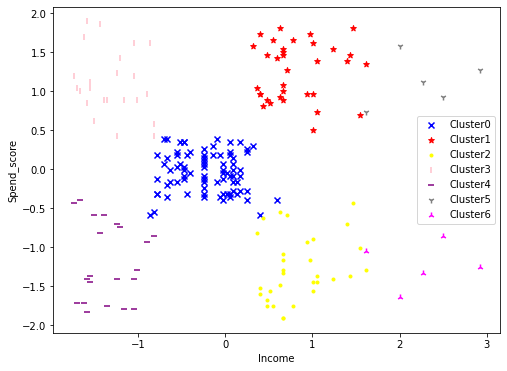

In [16]:
# Plotar o resultado da clusterização
plt.figure(figsize=[8,6])
for clust in range(mall_scaled.Cluster.nunique()):
    temp = mall_scaled[mall_scaled.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, \
                marker=markers[clust], \
                label="Cluster"+str(clust), \
                color=color[clust])
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.legend()
plt.show()

In [17]:
# Estimar o bandwidth com um quantile=0.15
bandwidth = estimate_bandwidth(mall_scaled[cluster_cols], quantile=0.15)
print(bandwidth)

0.8582301835333547


In [18]:
# Instanciar um objeto da classe MeanShift
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

# Fazer o fit do modelo aos dados re-escalados
ms.fit(mall_scaled[cluster_cols])

# Realizar a predição e guardar o resultado numa coluna do dataframe re-escalado
# agora com uma bandwidth=0.85 
mall_scaled['Cluster']= ms.predict(mall_scaled[cluster_cols])
mall_scaled.Cluster.unique()

array([3, 4, 0, 2, 1])

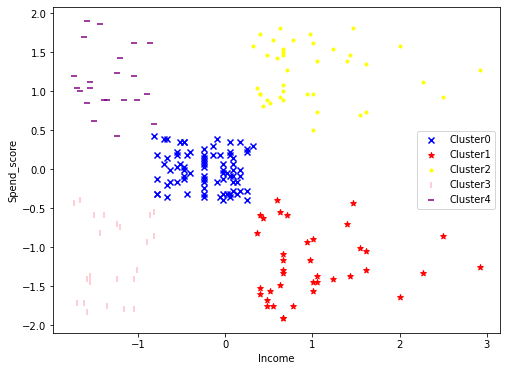

In [19]:
# Plotar o resultado da clusterização
plt.figure(figsize=[8,6])
for clust in range(mall_scaled.Cluster.nunique()):
    temp = mall_scaled[mall_scaled.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, \
                marker=markers[clust], \
                label="Cluster"+str(clust), \
                color=color[clust])
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.legend()
plt.show()

## Clusterização usando o método k-prototypes

In [20]:
import pandas as pd
bank0 = pd.read_csv("https://raw.githubusercontent.com/PacktPublishing/Data-Science-for-Marketing-Analytics-Second-Edition/master/Chapter04/Datasets/Bank_Personal_Loan_Modelling-2.csv")
bank0.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,Primary,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,Primary,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,Primary,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,Secondary,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,Secondary,0,0,0,0,0,1


In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
# Fazendo uma copia do dataframe
bank_scaled = bank0.copy()

# Rescalando a variavel Renda
bank_scaled['Income'] = scaler.fit_transform(bank0[['Income']])

## Aplicando o algoritmo k-prototypes 
### para clusterizar os dados da campanha de empréstimo bancário

In [23]:
# Instalar o pacote kmodes (que tem a implementação do kmodes e do k-prototypes)
!pip install kmodes The

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for The: filename=the-0.1.5-py3-none-any.whl size=6005 sha256=1b0269c0c57dc41781254411910bb7e1848505c46acb090f6a8fa54bbf5ba5f5
  Stored in directory: /root/.cache/pip/wheels/f0/9b/76/f019a880f5d490ed05a2425f6b0e2da238502879bd1721d96d
Successfully built The


In [24]:
# Importar a classe KPrototypes
from kmodes.kprototypes import KPrototypes

In [25]:
# Definir as colunas da clusterização
cluster_cols = ['Income', 'Education']

In [26]:
# Criar uma instância da classe KPrototypes ajustando o número de clusters
kp = KPrototypes(n_clusters=3, random_state=42)

# Realizar o fit do modelo aos dados e já efetuar a predição
bank_scaled['Cluster'] = kp.fit_predict(bank_scaled[cluster_cols], categorical=[1])

In [30]:
bank_scaled.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Cluster
0,1,25,1,-0.538229,91107,4,1.6,Primary,0,0,1,0,0,0,1
1,2,45,19,-0.864109,90089,3,1.5,Primary,0,0,1,0,0,0,0
2,3,39,15,-1.363793,94720,1,1.0,Primary,0,0,0,0,0,0,0
3,4,35,9,0.569765,94112,1,2.7,Secondary,0,0,0,0,0,0,1
4,5,35,8,-0.625130,91330,4,1.0,Secondary,0,0,0,0,0,1,0


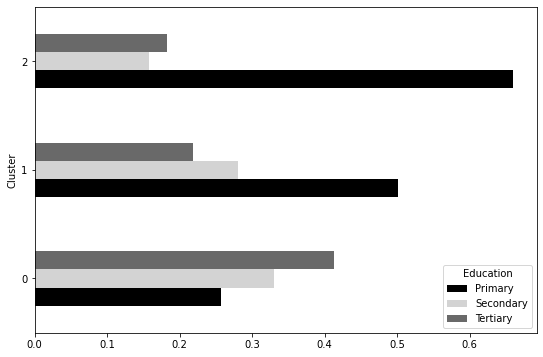

In [27]:
# Visualizar a distribuição da variavel Educação nos 3 clusters
res = bank_scaled.groupby('Cluster')['Education'].value_counts(normalize=True)

res.unstack().plot.barh(figsize=[9,6], color=['black','lightgray','dimgray'])
plt.show()


### O autor do livro cita que visualizar os graficos de dispersão de cada categoria torna a análise inviável
### Vamos verificar?

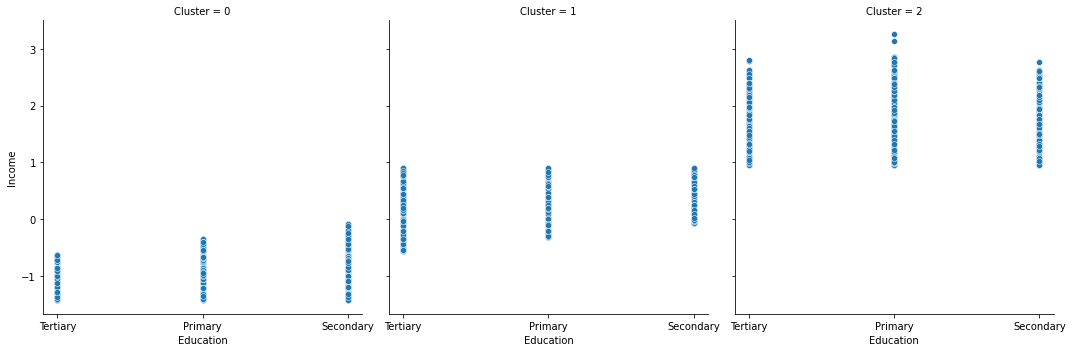

In [35]:
sns.relplot(x="Education", y="Income", data=bank_scaled, kind="scatter", col="Cluster")

#### Realmente fica um pouco confuso. Mas se plotarmos um boxplot?

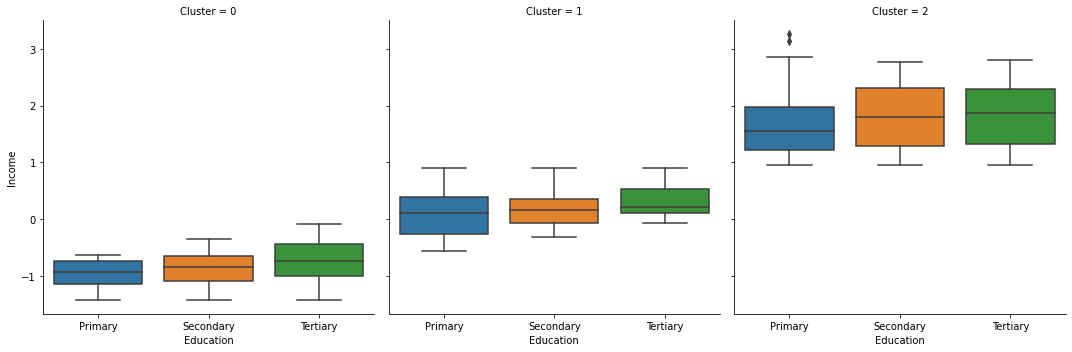

In [36]:
sns.catplot(x="Education", y="Income", data=bank_scaled, kind="box", col="Cluster")

### Ver um exemplo mais elaborado de clusterização com o k-prototypes [aqui](https://github.com/alexlopespereira/idp_competenciasdegestao/blob/main/Notebooks/Aula4/Kprototype_Aprilliant.ipynb).

## Encontrar o número ótimo de clusters utilizando o Score da Silhueta

In [1]:
# Importar a classe KMeans
from sklearn.cluster import KMeans

In [13]:
# Definir as colunas a serem clusterizadas
cluster_cols = ['Income', 'Spend_score']
# Filtrar as colunas
X = mall_scaled[cluster_cols]

In [18]:
# Criar um objeto KMeans de 3 clusters
model = KMeans(n_clusters=3, random_state=42)

# Fazer o fit e a predição
cluster_assignments = model.fit_predict(X)
cluster_assignments

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [19]:
from sklearn.metrics import silhouette_score
# Calcular o score da silhueta para K=3
silhouette_avg = silhouette_score(X, cluster_assignments)
print(silhouette_avg)

0.46658474419000145


In [16]:
# Calcular o Score da silhueta para K no intervalo 2 a 10
silhouette_scores = []

for K in range(2, 11):
    model = KMeans(n_clusters=K, random_state=42)
    cluster_assignments = model.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_assignments)
    silhouette_scores.append(silhouette_avg)

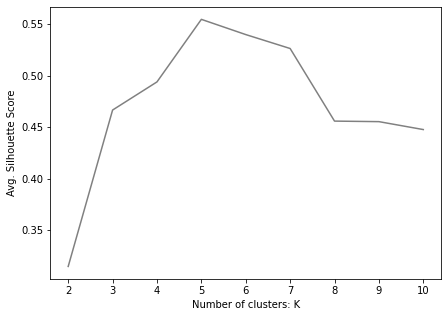

In [17]:
# Plotar o valor de do score em função de K
# K=5 é o valor que maximiza o Score da Silhueta
plt.figure(figsize=[7,5])
plt.plot(range(2,11), silhouette_scores, color='gray')
plt.xlabel("Number of clusters: K")
plt.ylabel('Avg. Silhouette Score')
plt.show()

## Usand split em Treinamento e Teste para avaliar o desempenho da Clusterização

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
# Separando o dataset em treinamento e teste
df_train, df_test = train_test_split(mall0, train_size=0.75, random_state=42)

In [22]:
print(df_train.shape)
print(df_test.shape)

(150, 5)
(50, 5)


In [23]:
# Criando uma instância do KMeans com k=6
model = KMeans(n_clusters=6, random_state=42)

# Fazendo o fit e a predição
df_train['Cluster'] = model.fit_predict(df_train[cluster_cols])

# Calculando o score da silhueta nos clusters resultantes da predição sobre o dado de treinamento
silhouette_avg = silhouette_score(df_train[cluster_cols], df_train['Cluster'])
print(silhouette_avg)

0.5436475209961419


In [24]:
# Realizando a predição sobre o dado de teste
df_test['Cluster'] = model.predict(df_test[cluster_cols])
# Calculando o score da silhueta para o dado de teste
silhouette_avg = silhouette_score(df_test[cluster_cols],df_test['Cluster'])
print(silhouette_avg)

0.49569011684195546


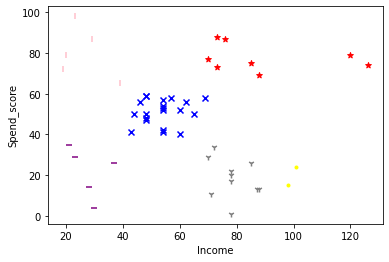

In [28]:
for clust in range(df_test.Cluster.nunique()):
    temp = df_test[df_test.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, marker=markers[clust], color=color[clust])
plt.xlabel("Income")
plt.ylabel("Spend_score")
plt.show()

## Exercício: Avaliar a clusterização em dataset de Clientes 
### Esse dataset contém um atributo para cada uma das 32 campanhas de marketing, e qual cliente aderiu a qual campanha.
### Vamos aplicar várias técnicas de segmentação e otimização de hiperparâmetros.

In [29]:
import pandas as pd
from sklearn import cluster
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
df = pd.read_csv('https://raw.githubusercontent.com/PacktPublishing/Data-Science-for-Marketing-Analytics-Second-Edition/master/Chapter04/Datasets/customer_offers.csv')

In [46]:
df.head()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [41]:
from sklearn import model_selection
# Fazendo o split em Treinamento e Teste
X_train, X_test = model_selection.train_test_split(df, random_state = 100)

### Clusterização com KMeans
#### O score da silhueta aponta para K=4. Mesmo assim, o score está bem baixo. A clusterização não está ideal.


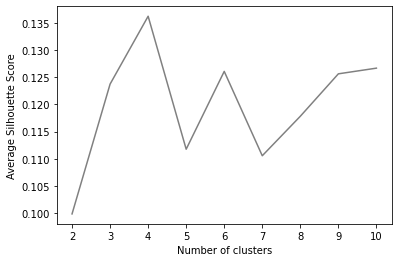

In [36]:
krange = list(range(2,11))
avg_silhouettes = []

for n in krange:
    model = cluster.KMeans(n_clusters=n, random_state=100)
    model.fit(X_train)
    cluster_assignments = model.predict(X_train) # Porque usar o dado de treinamento para investigar o score da silhueta na otimização de hiperparametros?

    silhouette_avg = metrics.silhouette_score(X_train, cluster_assignments)
    avg_silhouettes.append(silhouette_avg)

plt.plot(krange, avg_silhouettes, color='gray')
plt.xlabel("Number of clusters")
plt.ylabel("Average Silhouette Score")
plt.show()

In [35]:
model = cluster.KMeans(n_clusters=4, random_state=100)
model.fit(X_train)

# Realizando a predição sobre o dado de teste
km_labels = model.predict(X_test)
km_silhouette = metrics.silhouette_score(X_test, km_labels)

print('k-means silhouette score: ' + str(km_silhouette))

k-means silhouette score: 0.10342688033212433


### Clusterização com Mean Shift
#### O score da silhueta ficou pior do que o score do KMeans


In [42]:
bandwidth = cluster.estimate_bandwidth(X_train, quantile=0.1)

ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_train)

# Realizando a predição sobre o dado de teste
ms_labels = ms.predict(X_test)

ms_silhouette = metrics.silhouette_score(X_test, ms_labels)
print('mean-shift silhouette score: ' + str(ms_silhouette))

mean-shift silhouette score: 0.07308587709358311


### Clusterização com KModes
#### O score da silhueta ficou pior do que o score do KMeans

In [39]:
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


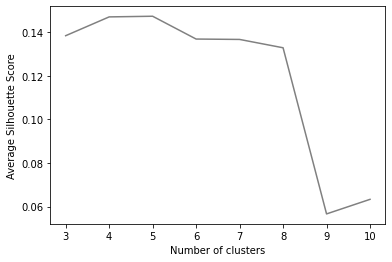

In [43]:
from kmodes.kmodes import KModes

krange = list(range(3,11))
avg_silhouettes = []

for n in krange:
    
    km = KModes(n_clusters=n, random_state=100)
    km.fit(X_train)

    kmode_labels = km.predict(X_train)
    kmode_silhouette = metrics.silhouette_score\
                       (X_train, kmode_labels)
    avg_silhouettes.append(kmode_silhouette)

plt.plot(krange, avg_silhouettes, color='gray')
plt.xlabel("Number of clusters")
plt.ylabel("Average Silhouette Score")
plt.show()

In [47]:
km = KModes(n_clusters=4, random_state=100)
km.fit(X_train)

kmode_labels = km.predict(X_test)
kmode_silhouette = metrics.silhouette_score(X_test, kmode_labels)

print('k-mode silhouette score: ' + str(kmode_silhouette))

k-mode silhouette score: 0.11750917239635501


### Qual das três técnicas gerou o melhor resultado? Qual o número ótimo de clusters?